In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv('Salary_Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
data.shape

(6704, 6)

In [5]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
data.describe(include='object')

,Gender,Education Level,Job Title
count,6702,6701,6702
unique,3,7,193
top,Male,Bachelor's Degree,Software Engineer
freq,3674,2267,518


# Handling Missing Value

In [9]:
data.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [10]:
data= data.dropna()
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [11]:
data.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Handling Incosistent Data

In [12]:
listcolumns = data.columns.tolist()
listcolumns[:3]
for i in listcolumns [:3]:
    print(i)
    print(data[i].unique())
    print('\n')
 

Age
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]


Gender
['Male' 'Female' 'Other']


Education Level
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']




In [13]:
for row, columns in data.iterrows():
    if columns['Education Level']== "Bachelor's Degree":
        data.at[row,'Education Level']="Bachelor's"
    elif columns['Education Level'] == "Master's Degree":
        data.at[row,'Education Level']="Master's"
    elif columns['Education Level'] == "phD":
        data.at[row,'Education Level']="PhD"

In [14]:
for i in listcolumns [:3]:
    print(i)
    print(data[i].unique())
    print('\n')

Age
[32. 28. 45. 36. 52. 29. 42. 31. 26. 38. 48. 35. 40. 27. 44. 33. 39. 25.
 51. 34. 47. 30. 41. 37. 24. 43. 50. 46. 49. 23. 53. 61. 57. 62. 55. 56.
 54. 60. 58. 22. 21.]


Gender
['Male' 'Female' 'Other']


Education Level
["Bachelor's" "Master's" 'PhD' 'High School']




# Handling Outlier

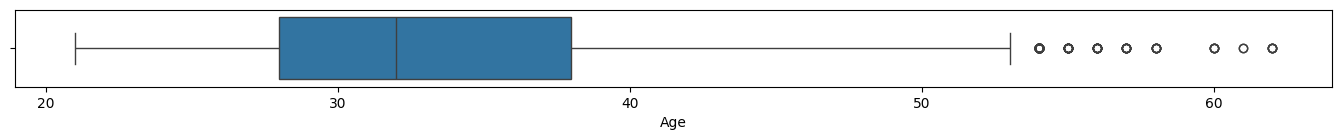

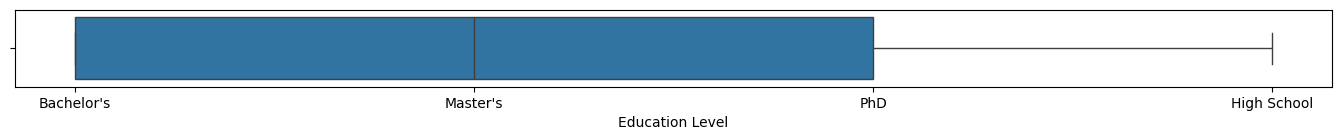

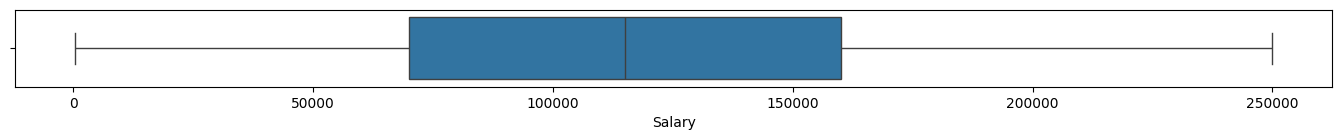

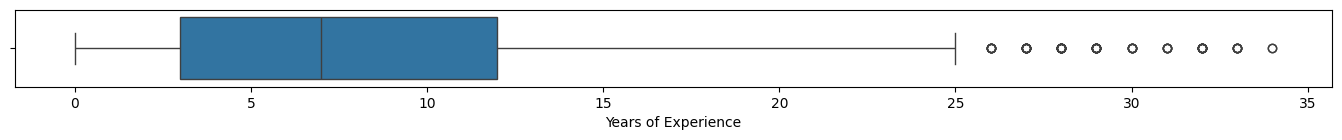

In [15]:
for columns in data[['Age', 'Education Level', 'Salary', 'Years of Experience']]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= data[['Age', 'Education Level', 'Salary', 'Years of Experience']], x = columns)

In [16]:
method = 'cap'
for i in ['Years of Experience', 'Age']:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    
    if method == 'cap':
        data.loc[:, i] = data[i].clip(lower=lower_bound, upper=upper_bound)
    elif method == 'remove':
        data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]



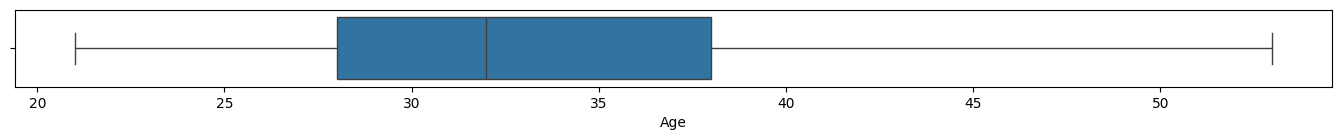

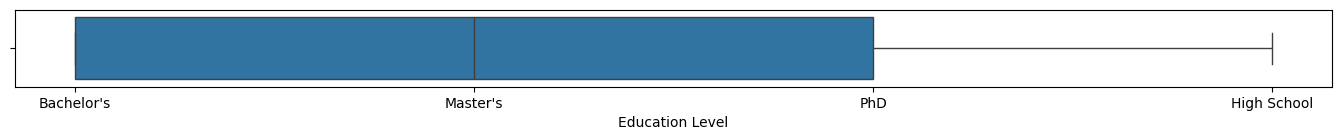

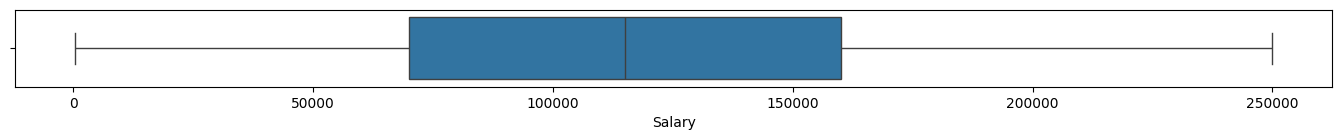

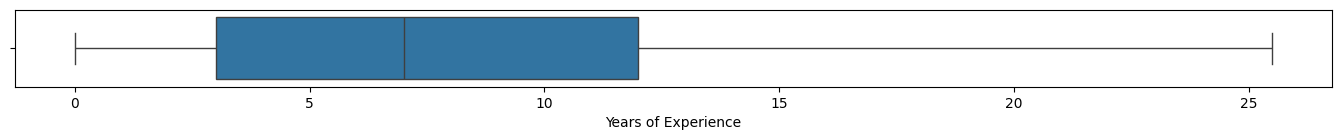

In [17]:
for columns in data[['Age', 'Education Level', 'Salary', 'Years of Experience']]:
    plt.figure(figsize=(17,1))
    sns.boxplot(data= data[['Age', 'Education Level', 'Salary', 'Years of Experience']], x = columns)

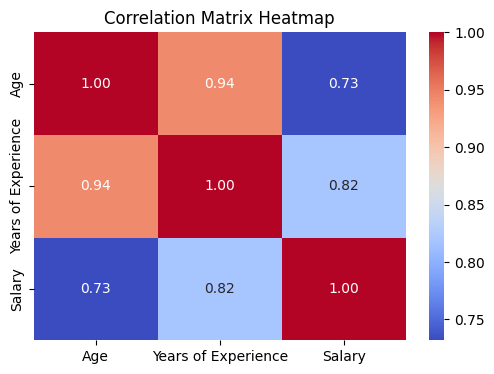

In [29]:
#Correlation Matrix
numeric_data = data[['Age', 'Years of Experience', 'Salary']]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Let's answer some questions

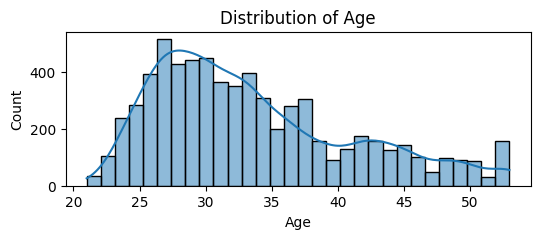

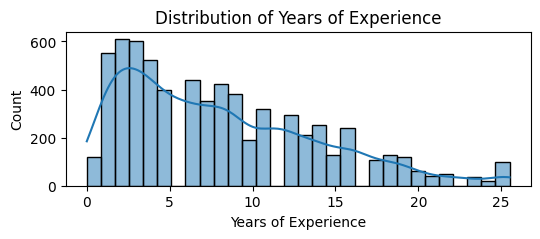

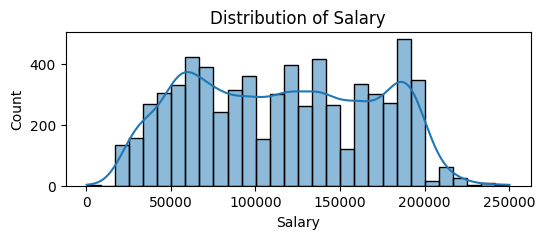

In [18]:
#1. What is the distribution of salaries in the dataset?
numeric_data= ['Age', 'Years of Experience', 'Salary']
for col in numeric_data:
    plt.figure(figsize=(6,2))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

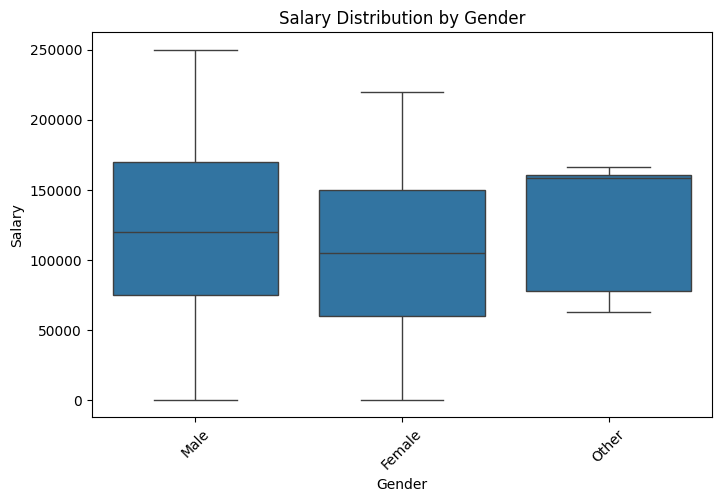

In [19]:
#2. How does Salary vary by Gender?
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')
plt.xticks(rotation=45)
plt.show()


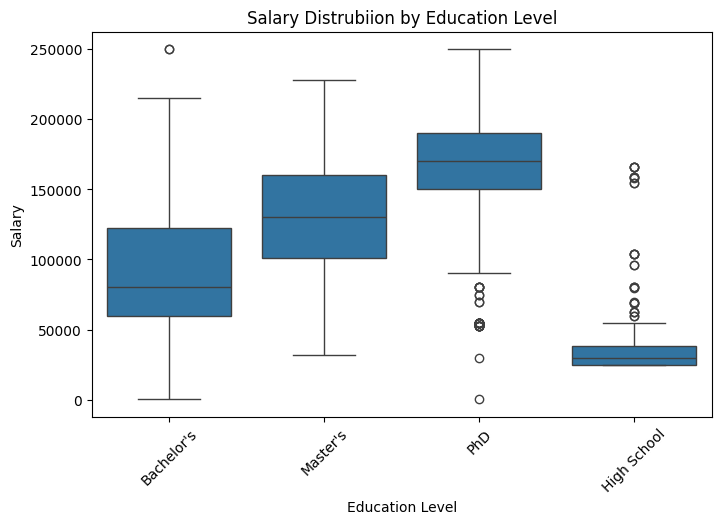

In [20]:
#3. How does Education Level impact Salary?
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Education Level', y='Salary')
plt.title('Salary Distrubiion by Education Level')
plt.xticks(rotation=45)#
plt.show()

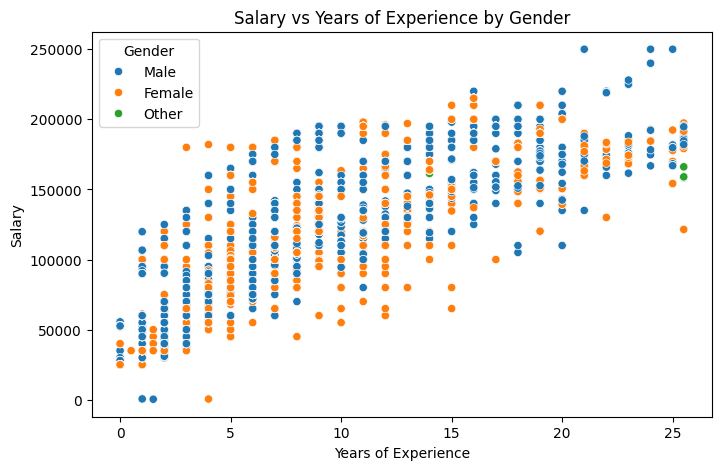

In [21]:
#4. What is the relationship between Years of Experience and Salary?
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Years of Experience', y='Salary', hue='Gender')
plt.title('Salary vs Years of Experience by Gender')
plt.show()


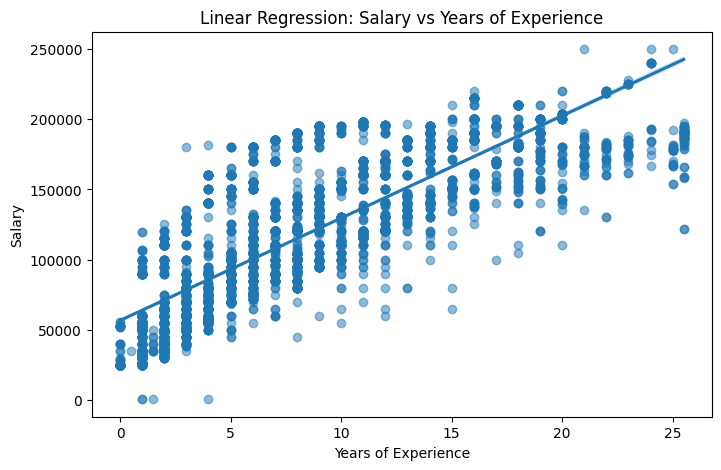

In [22]:
plt.figure(figsize=(8,5))
sns.regplot(data=data, x='Years of Experience', y='Salary', scatter_kws={'alpha':0.5})
plt.title('Linear Regression: Salary vs Years of Experience')
plt.show()


Job Title
CEO                            250000.000000
Chief Technology Officer       250000.000000
Chief Data Officer             220000.000000
Director of Data Science       204561.403509
Director                       200000.000000
VP of Finance                  200000.000000
Operations Director            190000.000000
VP of Operations               190000.000000
Director of Human Resources    187500.000000
Marketing Director             183984.375000
Name: Salary, dtype: float64

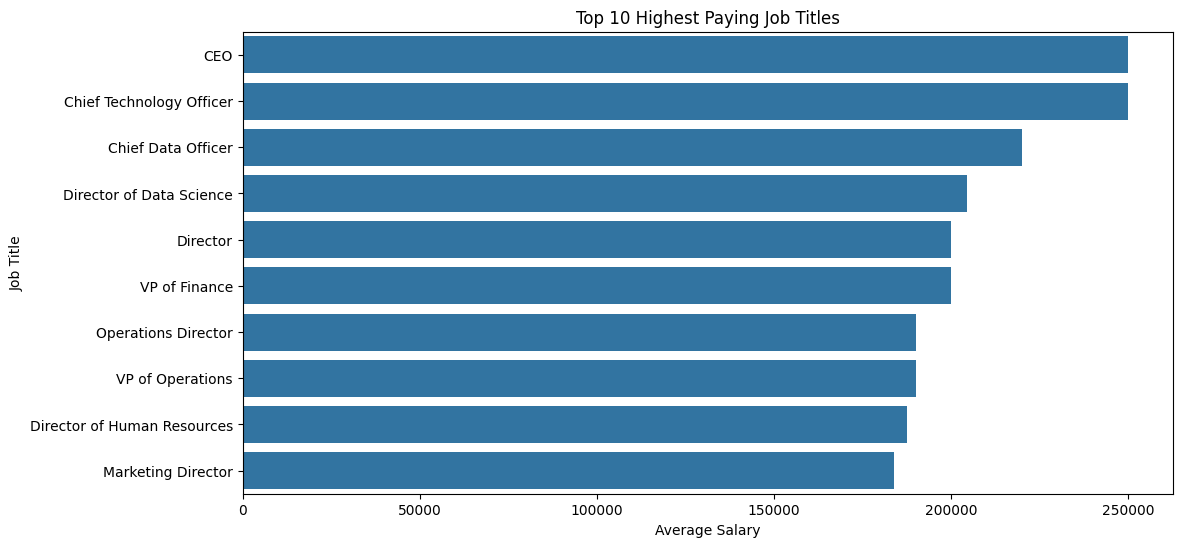

In [23]:
#5. Which Job Titles have the highest average salaries?
avg_salary= data.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)
top_10_jobs = avg_salary.head(10)
display(top_10_jobs)


# Visualize with a bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_jobs.values, y=top_10_jobs.index)
plt.title('Top 10 Highest Paying Job Titles')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()
  


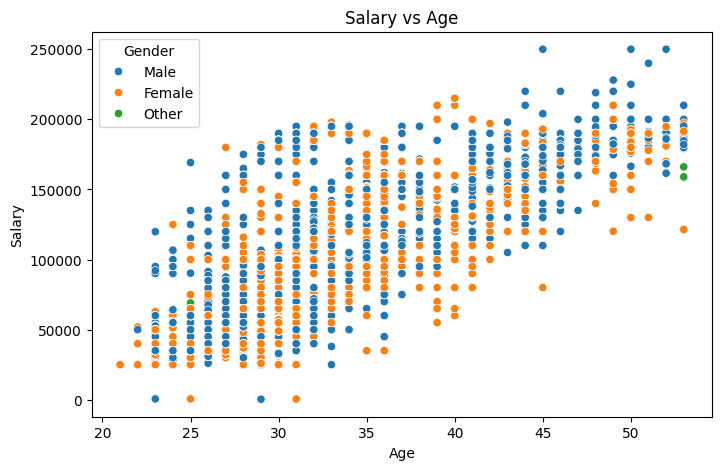

In [24]:
#6.What is the distribution of Age and how does it correlate with Salary?
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='Age', y='Salary', hue='Gender')
plt.title('Salary vs Age')
plt.show()

In [26]:
#7. Is there multicollinearity between Age and Years of Experience?
column=data[['Age', 'Years of Experience']]
vif_data=pd.DataFrame()
vif_data['variable']=column.columns
vif_data['vif']=[variance_inflation_factor(column.values,i) for i in range(column.shape[1])]
vif_data


,variable,vif
0,Age,5.699228
1,Years of Experience,5.699228
